Plot ventilation tracer

In [11]:
import numpy as np
import xarray as xr
import cmocean as cmocean
import numpy.linalg as la
from scipy.io import netcdf
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
from xgcm import Grid
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib
from matplotlib.colors import SymLogNorm, BoundaryNorm
from matplotlib.ticker import LogFormatter
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator


mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Computer Modern Roman']

In [2]:
# Snapshot
root = '/scratch/mp6191/NW2_TracerBackscatter'

exp = '/p5_noBS_KHTR0_2'
p5_noBS = xr.open_mfdataset(root + exp + '/dye*.nc', decode_times = False)
#p5_noBS_dye = xr.open_mfdataset(root + exp + '/dye*.nc', decode_times = False)
p5_noBS_h = xr.open_mfdataset(root + exp + '/MMT_fields*.nc', decode_times = False).h.mean('time')
p5_static = xr.open_dataset(root + '/p5_noBS_KHTR0' + '/static.nc', decode_times = False)
p5_coord = xr.open_dataset(root + '/p5_noBS_KHTR0' + '/MOM_IC.nc', decode_times = False).isel(Time = 0)
p5_coord = p5_coord.rename({'lath' : 'yh', 'lonh' : 'xh', 'latq' : 'yq', 'lonq' : 'xq', 'Layer' : 'zl', 'Interface' : 'zi'})

exp = '/p5_noBS_KHTR2400Var'
p5_noBS_KHTR = xr.open_mfdataset(root + exp + '/dye*.nc', decode_times = False)
#p5_noBS_KHTR_dye = xr.open_mfdataset(root + exp + '/dye*.nc', decode_times = False)

exp = '/p5_SQGBS_KHTR0_2'
p5_SQGBS = xr.open_mfdataset(root + exp + '/dye*.nc', decode_times = False)
#p5_SQGBS_dye = xr.open_mfdataset(root + exp + '/dye*.nc', decode_times = False)
p5_SQGBS_h = xr.open_mfdataset(root + exp + '/MMT_fields*.nc', decode_times = False).h.mean('time')

exp = '/p25_noBS_2'
p25_noBS = xr.open_mfdataset(root + exp + '/dye*.nc', decode_times = False)
#p25_noBS_dye = xr.open_mfdataset(root + exp + '/dye*.nc', decode_times = False)
p25_noBS_h = xr.open_mfdataset(root + exp + '/MMT_fields*.nc', decode_times = False).h.mean('time')
p25_static = xr.open_dataset(root + '/p25_SpinUp' + '/static.nc', decode_times = False)
p25_coord = xr.open_dataset(root + '/p25_SpinUp' + '/MOM_IC.nc', decode_times = False).isel(Time = 0)
p25_coord = p25_coord.rename({'lath' : 'yh', 'lonh' : 'xh', 'latq' : 'yq', 'lonq' : 'xq', 'Layer' : 'zl', 'Interface' : 'zi'})

exp = '/p25_noBS_KHTR2400Var'
p25_noBS_KHTR = xr.open_mfdataset(root + exp + '/dye*.nc', decode_times = False)
#p25_noBS_KHTR_dye = xr.open_mfdataset(root + exp + '/dye*.nc', decode_times = False)

exp = '/p25_SQGBS_2'
p25_SQGBS = xr.open_mfdataset(root + exp + '/dye*.nc', decode_times = False)
#p25_SQGBS_dye = xr.open_mfdataset(root + exp + '/dye*.nc', decode_times = False)
p25_SQGBS_h = xr.open_mfdataset(root + exp + '/MMT_fields*.nc', decode_times = False).h.mean('time')

exp = '/p03125_2'
p03125 = xr.concat([xr.open_mfdataset(root + '/p03125_SpinUp_2/dye*.nc', decode_times = False),
                    xr.open_mfdataset(root + exp + '/dye*.nc', decode_times = False)], dim = 'time')
p03125_h = xr.open_mfdataset(root + exp + '/MMT_fields*.nc', decode_times = False).h.mean('time')
p03125_static = xr.open_dataset(root + exp + '/static.nc', decode_times = False).isel(time = 0)

# Grid
p5_grid = Grid(p5_static, coords = {'X': {'center': 'xh', 'outer': 'xq'},
                                    'Y': {'center': 'yh', 'outer': 'yq'}}, periodic = ['X'])

p25_grid = Grid(p25_static, coords = {'X': {'center': 'xh', 'outer': 'xq'},
                                      'Y': {'center': 'yh', 'outer': 'yq'}}, periodic = ['X'])

p03125_grid = Grid(p03125_static, coords = {'X': {'center': 'xh', 'outer': 'xq'},
                                            'Y': {'center': 'yh', 'outer': 'yq'}}, periodic = ['X'])

/ext3/miniconda3/lib/python3.10/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/ext3/miniconda3/lib/python3.10/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/ext3/miniconda3/lib/python3.10/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/ext3/miniconda3/lib/python3.10/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Ser

In [3]:
def get_colors_from_cmap(cmap_name, n_colors):
    cmap = cm.get_cmap(cmap_name)
    return [cmap(i / (n_colors - 1)) for i in range(n_colors)]

blues   = get_colors_from_cmap('Blues', 10)
reds = ['#f69a8b', '#b91a38']
greys = get_colors_from_cmap('Greys', 10)

colorlist_p5 = [blues[4], reds[0]]
colorlist_p25 = [blues[8], reds[1]]
colorlist_p03125 = [greys[3], greys[5], 'k']

/state/partition1/job-66049042/ipykernel_844788/3569882092.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(cmap_name)


In [5]:
def plot_zm_ventilation(ds, h, static, ax):

    yh_min = -65
    yh_max = -15
    
    ds = ds.sel(yh = slice(yh_min, yh_max))
    h = h.sel(yh = slice(yh_min, yh_max))
    static = static.sel(yh = slice(yh_min, yh_max), yq = slice(yh_min, yh_max))

    dye = (ds.dye * h).sum(['xh']) / h.sum(['xh'])
    grid = Grid(static, coords = {'X': {'center': 'xh', 'outer': 'xq'},
                                  'Y': {'center': 'yh', 'outer': 'yq'}})
    
    eta = np.zeros((ds.zl.size + 1, ds.yh.size))
    D = static.depth_ocean
    for i in range(eta.shape[0]):
        eta[i, :] = (-D + np.nansum(h[i : , :, :], axis = 0)).mean('xh')
        
    eta = xr.DataArray(data = -eta,
                       dims = ['zi', 'yh'],
                       coords = {'zi': p5_coord.zi.values, 'yh': h.yh.values})

    eta_yq = grid.interp(eta, 'Y', boundary = 'fill').fillna(0.)
    
    # Density contours
    for i in range(16):
        if i == 4:
            ax.plot(eta_yq.yq, eta_yq.isel(zi = i), linewidth = 1., color = 'k')#, linewidth = 1.5, color = 'k')
        elif i == 5:
            ax.plot(eta_yq.yq, eta_yq.isel(zi = i), linewidth = 1., color = 'k')#, linewidth = 1.5, color = 'k')
        else:
            ax.plot(eta_yq.yq, eta_yq.isel(zi = i), linewidth = 0.35, color = 'white', alpha = 0.5)
    
    plt.axhline(y = 100, color = 'w', linestyle = '--', linewidth = 0.5)
    
    # Tracer
    plotted = ax.pcolormesh(eta_yq.yq, eta_yq, dye, vmin = vmin, vmax = vmax, cmap = cmocean.cm.haline)
    ax.set_ylim([0, 1250])
    ax.set_xlim([yh_min, yh_max])
    ax.set_yticks(np.linspace(0, 1250, 6))
    ax.set_xticks(np.linspace(-60, -20, 5))
    ax.invert_yaxis()
    ax.set_facecolor((0.92, 0.92, 0.92))
    ax.axhline(y = 100, color = 'w', linestyle = '--', linewidth = 1.)

    return plotted

def calc_isopleth_lat(dye, isopleth):
    '''
    Restricted to away from the eastern and western shelves
    '''
    dye = dye.fillna(1e6).sel(xh = slice(7.5, 52.5))
    
    dye_isopleth = dye - isopleth
    dye_isopleth = dye_isopleth.where(dye_isopleth != 1. - isopleth)
    dye_isopleth = dye_isopleth.where(dye_isopleth != 0. - isopleth)

    yh = dye_isopleth.yh
    yh_min = yh[np.abs(dye_isopleth).argmin('yh').load()].mean('xh')

    return yh_min

def haversine(lat1, lat2):
    '''
    Return haversine distance between lat1 and lat2 at constant longitude
    '''
    Re = 6.37e6
    
    lat1 = lat1 * np.pi / 180
    lat2 = lat2 * np.pi / 180
    
    dlat = lat2 - lat1

    a = np.sin(dlat / 2) ** 2
    b = np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    d = Re * b

    return d

def area_ave(var, static):

    area = static.area_t

    return (var * area).sum(['xh', 'yh']) / area.sum(['xh', 'yh'])

In [6]:
isopleth = 0.1
zl = 4

p5_noBS_p1dye = calc_isopleth_lat(p5_noBS.isel(zl = zl).dye, isopleth).load()
p5_noBS_KHTR_p1dye = calc_isopleth_lat(p5_noBS_KHTR.isel(zl = zl).dye, isopleth).load()
p5_SQGBS_p1dye = calc_isopleth_lat(p5_SQGBS.isel(zl = zl).dye, isopleth).load()

p25_noBS_p1dye = calc_isopleth_lat(p25_noBS.isel(zl = zl).dye, isopleth).load()
p25_noBS_KHTR_p1dye = calc_isopleth_lat(p25_noBS_KHTR.isel(zl = zl).dye, isopleth).load()
p25_SQGBS_p1dye = calc_isopleth_lat(p25_SQGBS.isel(zl = zl).dye, isopleth).load()

In [7]:
p5_noBS_AreaAveDye = area_ave(p5_noBS.isel(zl = zl).dye, p5_static).load()
p5_noBS_KHTR_AreaAveDye = area_ave(p5_noBS_KHTR.isel(zl = zl).dye, p5_static).load()
p5_SQGBS_AreaAveDye = area_ave(p5_SQGBS.isel(zl = zl).dye, p5_static).load()

p25_noBS_AreaAveDye = area_ave(p25_noBS.isel(zl = zl).dye, p25_static).load()
p25_noBS_KHTR_AreaAveDye = area_ave(p25_noBS_KHTR.isel(zl = zl).dye, p25_static).load()
p25_SQGBS_AreaAveDye = area_ave(p25_SQGBS.isel(zl = zl).dye, p25_static).load()

In [8]:
p03125_p1dye = calc_isopleth_lat(p03125.isel(zl = zl).dye, isopleth).load()
p03125_AreaAveDye = area_ave(p03125.isel(zl = zl).dye, p03125_static).load()

### Plot

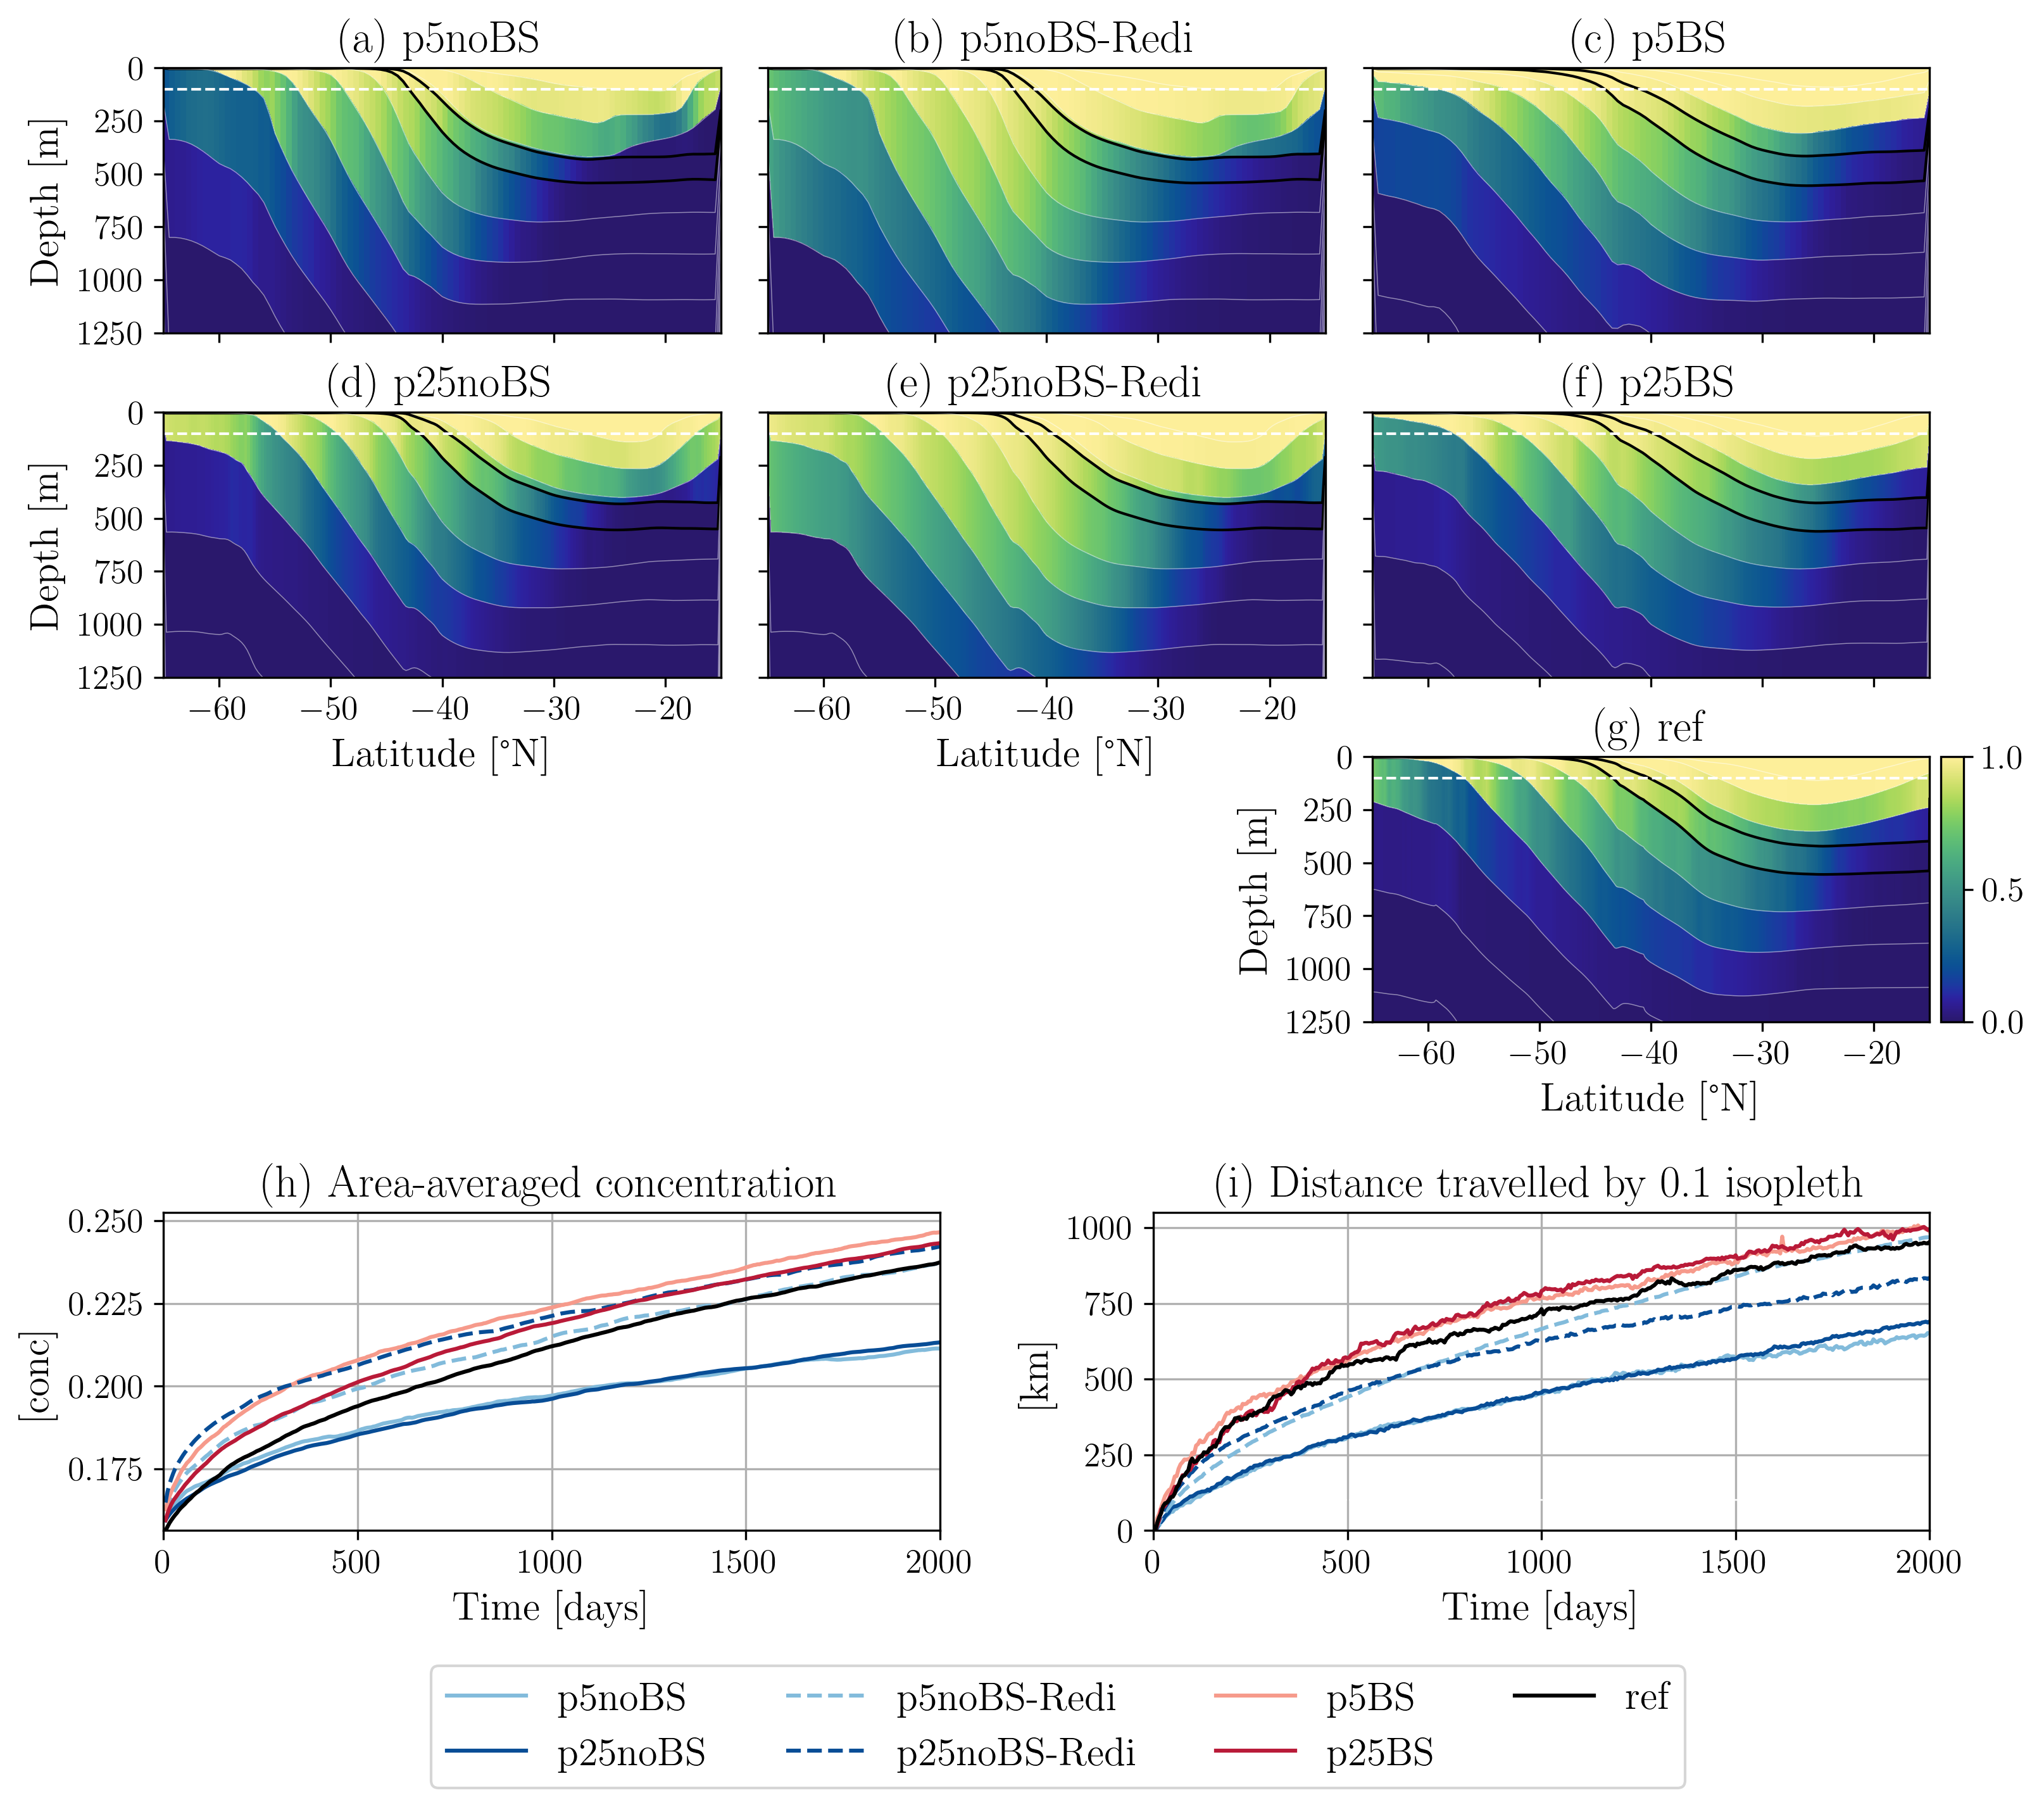

In [9]:
# Shared
vmax = 1
vmin = 0

# Create figure
fig = plt.figure(figsize = (12, 10), dpi = 300)
fontsize = 15
linewidth = 1.5

# Main grid
outer_gs = gridspec.GridSpec(2, 1, height_ratios = [3, 1], figure = fig, hspace = 0.3)

# Top
top_gs = gridspec.GridSpecFromSubplotSpec(3, 3, subplot_spec = outer_gs[0], wspace = 0.085, hspace = 0.3)

ax1 = fig.add_subplot(top_gs[0, 0])
ax2 = fig.add_subplot(top_gs[0, 1], sharex=ax1, sharey=ax1)
ax3 = fig.add_subplot(top_gs[0, 2], sharex=ax1, sharey=ax1)

ax4 = fig.add_subplot(top_gs[1, 0], sharex=ax1, sharey=ax1)
ax5 = fig.add_subplot(top_gs[1, 1], sharex=ax1, sharey=ax1)
ax6 = fig.add_subplot(top_gs[1, 2], sharex=ax1, sharey=ax1)

ax7 = fig.add_subplot(top_gs[2, 2], sharex=ax1, sharey=ax1)

# Bottom
bottom_gs = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec = outer_gs[1], wspace = 0.275)
ax8 = fig.add_subplot(bottom_gs[0, 0])
ax9 = fig.add_subplot(bottom_gs[0, 1])

# Plot
ax = ax1
plot_zm_ventilation(p5_noBS.isel(time = -1), p5_noBS_h, p5_static, ax)
ax.set_xlabel('', fontsize = fontsize)
ax.set_ylabel('Depth [m]', fontsize = fontsize)
ax.tick_params(labelsize = fontsize - 2)

ax = ax2
plot_zm_ventilation(p5_noBS_KHTR.isel(time = -1), p5_noBS_h, p5_static, ax)
ax.set_xlabel('', fontsize = fontsize - 1)
ax.set_ylabel('', fontsize = fontsize)
ax.tick_params(labelsize = fontsize - 2)

ax = ax3
plot_zm_ventilation(p5_SQGBS.isel(time = -1), p5_SQGBS_h, p5_static, ax)
ax.set_xlabel('', fontsize = fontsize)
ax.set_ylabel('', fontsize = fontsize)
ax.tick_params(labelsize = fontsize - 2)

ax = ax4
plot_zm_ventilation(p25_noBS.isel(time = -1), p25_noBS_h, p25_static, ax)
ax.set_xlabel('Latitude [°N]', fontsize = fontsize)
ax.set_ylabel('Depth [m]', fontsize = fontsize)
ax.tick_params(labelsize = fontsize - 2)

ax = ax5
plot_zm_ventilation(p25_noBS_KHTR.isel(time = -1), p25_noBS_h, p25_static, ax)
ax.set_xlabel('Latitude [°N]', fontsize = fontsize)
ax.set_ylabel('', fontsize = fontsize)
ax.tick_params(labelsize = fontsize - 2)

ax = ax6
plot_zm_ventilation(p25_SQGBS.isel(time = -1), p25_SQGBS_h, p25_static, ax)
ax.set_xlabel('', fontsize = fontsize)
ax.set_ylabel('', fontsize = fontsize)
ax.tick_params(labelsize = fontsize - 2)

ax = ax7
plotted = plot_zm_ventilation(p03125.isel(time = -1), p03125_h, p03125_static, ax)
ax.set_xlabel('Latitude [°N]', fontsize = fontsize)
ax.set_ylabel('Depth [m]', fontsize = fontsize)
ax.tick_params(labelsize = fontsize - 2)

# Create colorbar axis manually
cbar_ax = fig.add_axes([ax7.get_position().x1 + 0.005,  # X position (slightly right of Panel 5)
                        ax7.get_position().y0 + 0.0,    # Y position (aligns with Panel 5)
                        0.01,                           # Width (thin colorbar)
                        ax7.get_position().height * 1])     # Height (same as Panel 5)

cbar = fig.colorbar(mappable = plotted, cax = cbar_ax)
cbar.ax.tick_params(labelsize = fontsize - 2)

# Concentration
ax = ax8
ax.set_xlabel('Time [days]', fontsize = fontsize)
ax.set_ylabel('[conc]', fontsize = fontsize)
ax.tick_params(labelsize = fontsize - 2)
ax.grid()
ax.set_xlim([0, 2000])
ax.set_ylim([p03125_AreaAveDye.min().item(), 0.2525])
ax.set_yticks([0.175, 0.2, 0.225, 0.25])

ds = p5_noBS_AreaAveDye
t = np.linspace(5, ds.time.values[-1] - 43000, ds.time.size)
ax.plot(t, ds, color = colorlist_p5[0], linewidth = linewidth)

ds = p5_noBS_KHTR_AreaAveDye
t = np.linspace(5, ds.time.values[-1] - 28000, ds.time.size)
ax.plot(t, ds, color = colorlist_p5[0], linestyle = '--', linewidth = linewidth)

ds = p5_SQGBS_AreaAveDye
t = np.linspace(5, ds.time.values[-1] - 43000, ds.time.size)
ax.plot(t, ds, color = colorlist_p5[1], linewidth = linewidth)

ds = p25_noBS_AreaAveDye
t = np.linspace(5, ds.time.values[-1] - 43000, ds.time.size)
ax.plot(t, ds, color = colorlist_p25[0], linewidth = linewidth)

ds = p25_noBS_KHTR_AreaAveDye
t = np.linspace(5, ds.time.values[-1] - 28000, ds.time.size)
ax.plot(t, ds, color = colorlist_p25[0], linestyle = '--', linewidth = linewidth)

ds = p25_SQGBS_AreaAveDye
t = np.linspace(5, ds.time.values[-1] - 43000, ds.time.size)
ax.plot(t, ds, color = colorlist_p25[1], linewidth = linewidth)

ds = p03125_AreaAveDye
t = np.linspace(5, p03125.time[-1].item(), ds.time.size)
ax.plot(t, ds, color = colorlist_p03125[2], linewidth = linewidth)

# 0.1 contour
ax = ax9
ax.set_xlabel('Time [days]', fontsize = fontsize)
ax.set_ylabel('[km]', fontsize = fontsize)
ax.tick_params(labelsize = fontsize - 2)
ax.grid()
ax.set_xlim([0, 2000])
ax.set_ylim([0, 1050])
ax.set_yticks([0, 250, 500, 750, 1000])

# noBS
ds = p5_noBS_p1dye
t = np.linspace(5, ds.time.values[-1] - 43000, ds.time.size)
dist = np.zeros(ds.size)
for i in range(1, dist.size):
    dist[i] = haversine(ds.values[0], ds.values[i])
ax.plot(t, dist / 1e3, label = 'p5noBS', color = colorlist_p5[0], linewidth = linewidth)

ds = p25_noBS_p1dye
t = np.linspace(5, ds.time.values[-1] - 43000, ds.time.size)
dist = np.zeros(ds.size)
for i in range(1, dist.size):
    dist[i] = haversine(ds.values[0], ds.values[i])
ax.plot(t, dist / 1e3, label = 'p25noBS', color = colorlist_p25[0], linewidth = linewidth)

# noBS-KHTR
ds = p5_noBS_KHTR_p1dye
t = np.linspace(5, ds.time.values[-1] - 28000, ds.time.size)
dist = np.zeros(ds.size)
for i in range(1, dist.size):
    dist[i] = haversine(ds.values[0], ds.values[i])
ax.plot(t, dist / 1e3, label = 'p5noBS-Redi', color = colorlist_p5[0], linestyle = '--', linewidth = linewidth)

ds = p25_noBS_KHTR_p1dye
t = np.linspace(5, ds.time.values[-1] - 28000, ds.time.size)
dist = np.zeros(ds.size)
for i in range(1, dist.size):
    dist[i] = haversine(ds.values[0], ds.values[i])
ax.plot(t, dist / 1e3, label = 'p25noBS-Redi', color = colorlist_p25[0], linestyle = '--', linewidth = linewidth)

# BS
ds = p5_SQGBS_p1dye
t = np.linspace(5, ds.time.values[-1] - 43000, ds.time.size)
dist = np.zeros(ds.size)
for i in range(1, dist.size):
    dist[i] = haversine(ds.values[0], ds.values[i])
ax.plot(t, dist / 1e3, label = 'p5BS', color = colorlist_p5[1], linewidth = linewidth)

ds = p25_SQGBS_p1dye
t = np.linspace(5, ds.time.values[-1] - 43000, ds.time.size)
dist = np.zeros(ds.size)
for i in range(1, dist.size):
    dist[i] = haversine(ds.values[0], ds.values[i])
ax.plot(t, dist / 1e3, label = 'p25BS', color = colorlist_p25[1], linewidth = linewidth)

# p03125
ds = p03125_p1dye
t = np.linspace(5, ds.time[-1].item(), ds.time.size)
dist = np.zeros(ds.size)
for i in range(1, dist.size):
    dist[i] = haversine(ds.values[0], ds.values[i])
ax.plot(t, dist / 1e3, label = 'ref', color = colorlist_p03125[2], linewidth = linewidth)

ax.plot(t, dist / 1e3, alpha = 0., label = ' ') # legend purposes

fig.legend(fontsize = fontsize, loc = 'lower center', ncol = 4, bbox_to_anchor = (0.5175, -0.036))

# Set titles
ax1.set_title('(a) p5noBS', fontsize = fontsize + 2)
ax2.set_title('(b) p5noBS-Redi', fontsize = fontsize + 2)
ax3.set_title('(c) p5BS', fontsize = fontsize + 2)
ax4.set_title('(d) p25noBS', fontsize = fontsize + 2)
ax5.set_title('(e) p25noBS-Redi', fontsize = fontsize + 2)
ax6.set_title('(f) p25BS', fontsize = fontsize + 2)
ax7.set_title('(g) ref', fontsize = fontsize + 2)
ax8.set_title('(h) Area-averaged concentration', fontsize = fontsize + 2)
ax9.set_title('(i) Distance travelled by 0.1 isopleth', fontsize = fontsize + 2)

# Hide labels
ax1.tick_params(labelbottom = False)
ax2.tick_params(labelbottom = False, labelleft = False)
ax3.tick_params(labelbottom = False, labelleft = False)
ax5.tick_params(labelleft = False)
ax6.tick_params(labelbottom = False, labelleft = False)

# Save figure
plt.savefig('Fig_ventilation_tracer.png', bbox_inches = 'tight', dpi = 300)